# `chunked_func`
Performs the specfied operation one "chunk" at a time to save memory.

## Import Packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
from skimage.morphology import disk
import time
ps.visualization.set_mpl_style()

## `func`
We will perform a dilation using scipy's `binary_dilation`

In [2]:
func = spim.binary_dilation

## `im` and `strel`
This function takes a binary image and a structuring element as arguments

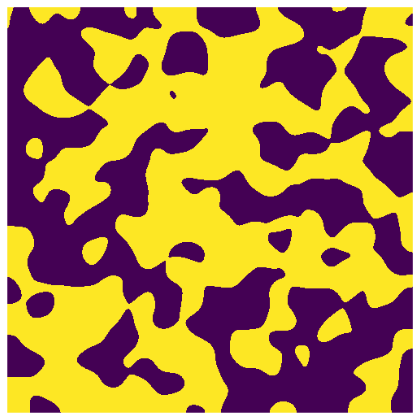

In [3]:
im = ps.generators.blobs(shape=[500, 500])
strel = disk(3)

plt.figure(figsize=[6, 6])
plt.imshow(im)
plt.axis(False);

## `overlap`, `divs`, and `cores`
If overlap is `None` it will always be the radius of the structuring element. `divs` is the number of chunks to divide the image into in each direction and `cores` is the number of cores to use. The more cores the faster.

OPERATION TIME:
cores=1: 0.019270658493041992 seconds
cores=4: 0.007903575897216797 seconds


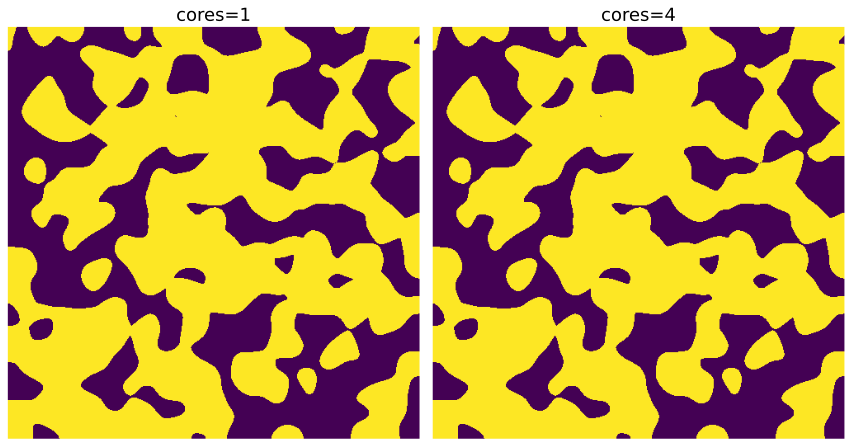

In [4]:
start = time.time()
x1 = ps.filters.chunked_func(func=func, overlap=None, divs=4, cores=1, input=im, structure=disk(3))
pause = time.time()
x2 = ps.filters.chunked_func(func=func, overlap=None, divs=4, cores=4, input=im, structure=disk(3))
stop = time.time()

print('OPERATION TIME:')
print('cores=1:', pause-start, 'seconds')
print('cores=4:', stop-pause, 'seconds')

fix, ax = plt.subplots(1, 2, figsize=[12, 12])
ax[0].axis(False)
ax[0].imshow(x1)
ax[0].set_title('cores=1', fontdict={'fontsize': 18});
ax[1].axis(False)
ax[1].imshow(x2);
ax[1].set_title('cores=4', fontdict={'fontsize': 18});